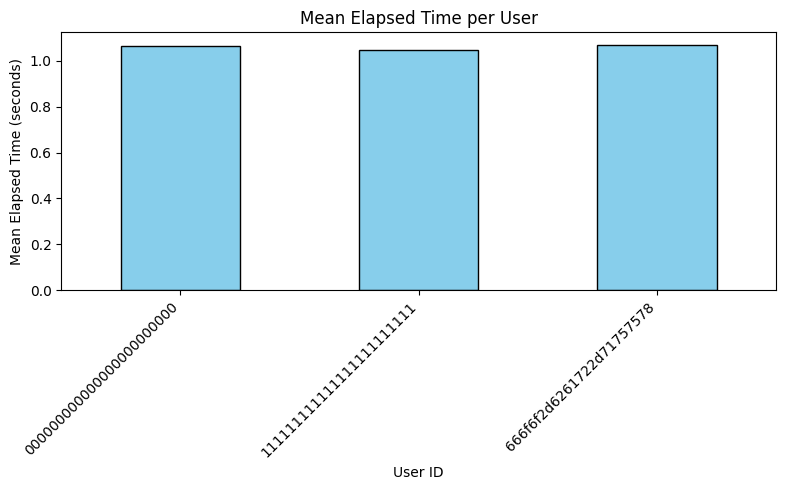

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'results_200_simple.csv'
df = pd.read_csv(file_path)
mean_elapsed_time = df.groupby("User ID")["Elapsed Time (seconds)"].mean()
plt.figure(figsize=(8, 5))
mean_elapsed_time.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Mean Elapsed Time per User")
plt.ylabel("Mean Elapsed Time (seconds)")
plt.xlabel("User ID")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


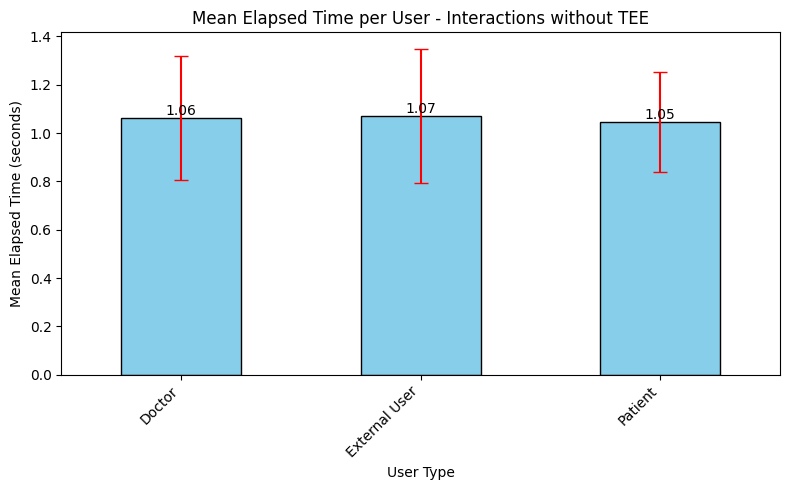

In [59]:
# Define custom labels for User IDs
user_labels = {
    "000000000000000000000000": "Doctor",
    "111111111111111111111111": "Patient",
    "666f6f2d6261722d71757578": "External User"
}

# Map User IDs to custom labels in the DataFrame
df["User Label"] = df["User ID"].map(user_labels)

# Calculate mean and standard deviation for each user
grouped = df.groupby("User Label")["Elapsed Time (seconds)"]
mean_elapsed_time = grouped.mean()
std_dev_elapsed_time = grouped.std()  # Standard deviation

# Bar chart with error bars for standard deviation
plt.figure(figsize=(8, 5))
bars = mean_elapsed_time.plot(kind="bar", yerr=std_dev_elapsed_time, capsize=5, 
                               color="skyblue", edgecolor="black", error_kw=dict(ecolor='red', lw=1.5))

# Annotate each bar with its value
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}",
             ha='center', va='bottom', fontsize=10, color='black')

# Customize plot
plt.title("Mean Elapsed Time per User - Interactions without TEE")
plt.ylabel("Mean Elapsed Time (seconds)")
plt.xlabel("User Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

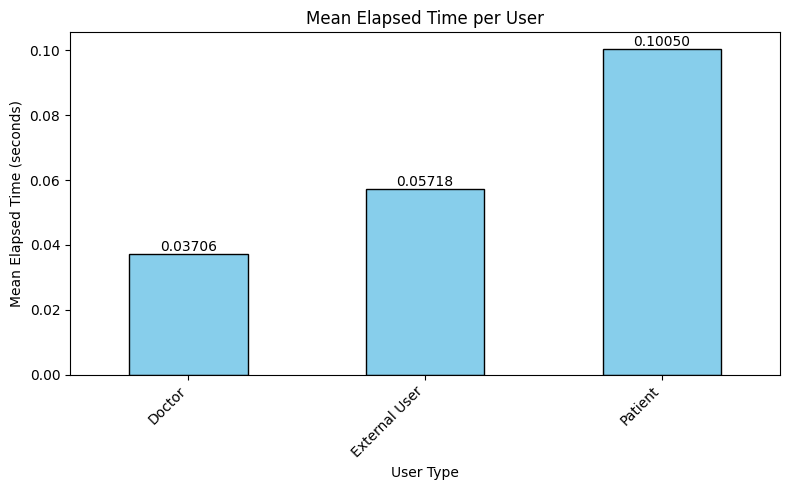

In [60]:
file_path = 'results_100_basic_no_overhead.csv'
df = pd.read_csv(file_path)
user_labels = {
    "patient1": "Patient",
    "doctor1": "Doctor",
    "external1": "External User"
}

# Map User IDs to custom labels in the DataFrame
df["User Label"] = df["User ID"].map(user_labels)

# Calculate mean elapsed time for each user
grouped = df.groupby("User Label")["Elapsed Time (seconds)"]
mean_elapsed_time = grouped.mean()

# Bar chart without error bars
plt.figure(figsize=(8, 5))
bars = mean_elapsed_time.plot(kind="bar", color="skyblue", edgecolor="black")

# Annotate each bar with its value
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.5f}",
             ha='center', va='bottom', fontsize=10, color='black')

# Customize plot
plt.title("Mean Elapsed Time per User")
plt.ylabel("Mean Elapsed Time (seconds)")
plt.xlabel("User Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


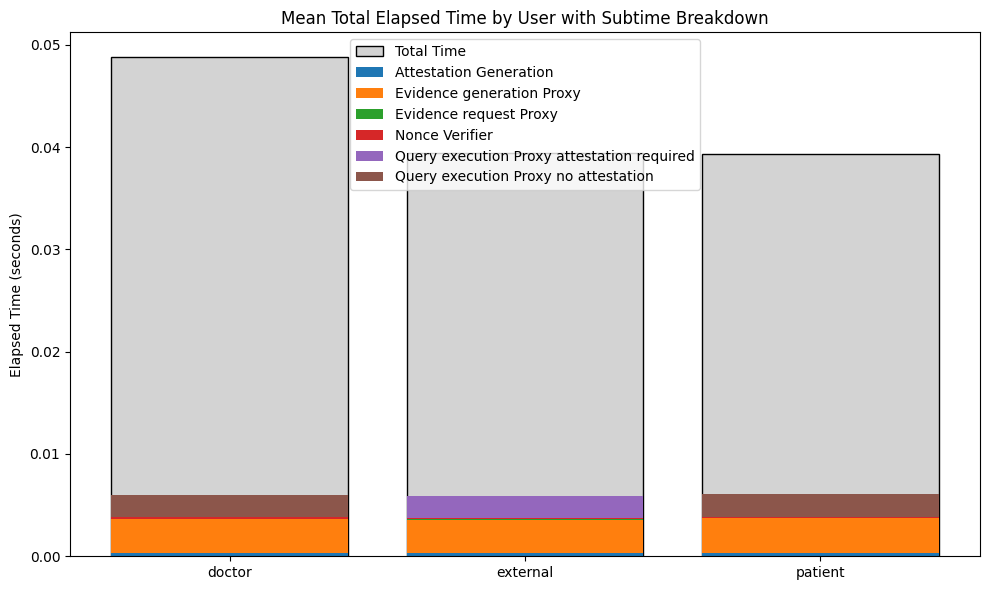

In [61]:
file_path = 'results_100_basic.csv'
df = pd.read_csv(file_path)

# Replace specific entries in the 'Client Result' column
df["Client Result"] = df["Client Result"].replace({
    "b'[{\"bp\": 100}]'": "total time",
    "Attestation required, access denied": "total time"
})
# Backfill to associate subtimes with the corresponding user
df["User ID"] = df["User ID"].bfill()

# Extract user category from User ID
df["User"] = df["User ID"].str.extract(r"([a-zA-Z]+)")

# Separate total times and subtimes
total_times = df[df["Client Result"] == "total time"].copy()
subtimes = df[df["Client Result"] != "total time"].copy()

# Calculate mean total elapsed time for each user
mean_total_times = total_times.groupby("User")["Elapsed Time (seconds)"].mean()

# Calculate mean subtimes per user and operation
subtimes_grouped = subtimes.groupby(["User", "Client Result"])["Elapsed Time (seconds)"].mean().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_positions = range(len(mean_total_times))
bars = ax.bar(bar_positions, mean_total_times, label="Total Time", color="lightgray", edgecolor="black")

# Stack subtimes
bottom = [0] * len(mean_total_times)
for operation in subtimes_grouped.columns:
    times = subtimes_grouped[operation].reindex(mean_total_times.index, fill_value=0)
    ax.bar(bar_positions, times, bottom=bottom, label=operation)
    bottom = [b + t for b, t in zip(bottom, times)]

# Add labels and legend
ax.set_xticks(bar_positions)
ax.set_xticklabels(mean_total_times.index)
ax.set_ylabel("Elapsed Time (seconds)")
ax.set_title("Mean Total Elapsed Time by User with Subtime Breakdown")
ax.legend()

plt.tight_layout()
plt.show()

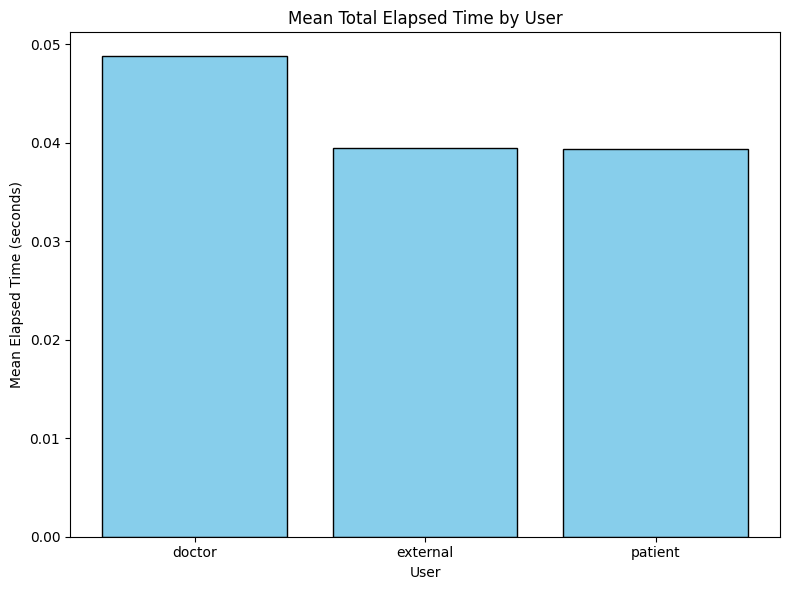

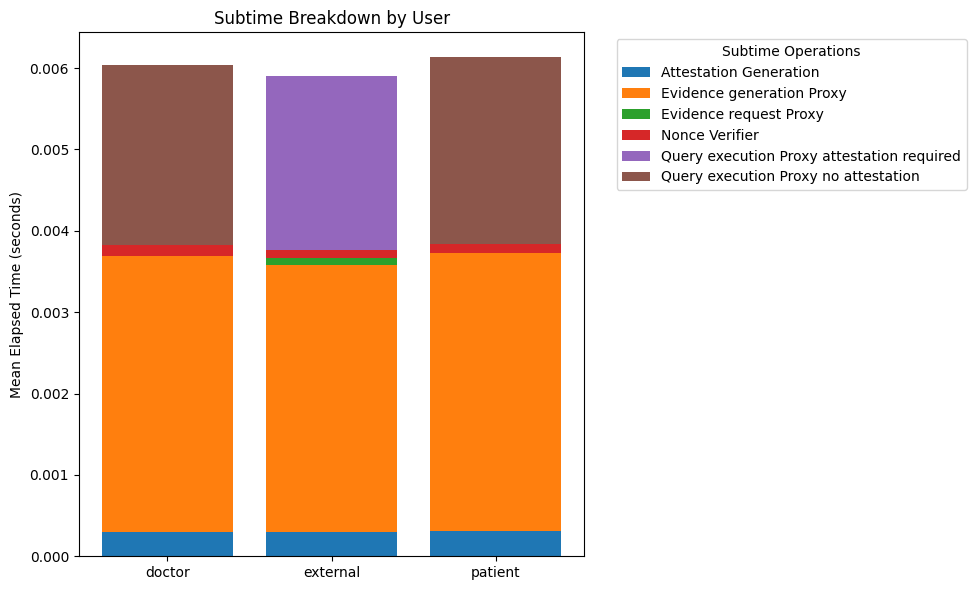

In [62]:
file_path = 'results_100_basic.csv'
df = pd.read_csv(file_path)
df["Client Result"] = df["Client Result"].replace({
    "b'[{\"bp\": 100}]'": "total time",
    "Attestation required, access denied": "total time"
})

# Backfill to associate subtimes with the corresponding user
df["User ID"] = df["User ID"].bfill()

# Extract user category from User ID
df["User"] = df["User ID"].str.extract(r"([a-zA-Z]+)")

# Separate total times and subtimes
total_times = df[df["Client Result"] == "total time"].copy()
subtimes = df[df["Client Result"] != "total time"].copy()

# Calculate mean total elapsed time for each user
mean_total_times = total_times.groupby("User")["Elapsed Time (seconds)"].mean()

# Calculate mean subtimes per user and operation
subtimes_grouped = subtimes.groupby(["User", "Client Result"])["Elapsed Time (seconds)"].mean().unstack(fill_value=0)

# First Graph: Total Times
plt.figure(figsize=(8, 6))
plt.bar(mean_total_times.index, mean_total_times, color="skyblue", edgecolor="black")
plt.ylabel("Mean Elapsed Time (seconds)")
plt.title("Mean Total Elapsed Time by User")
plt.xlabel("User")
plt.tight_layout()
plt.show()

# Second Graph: Subtimes
fig, ax = plt.subplots(figsize=(10, 6))
bar_positions = range(len(subtimes_grouped))
bottom = [0] * len(bar_positions)

# Stacked bars for subtimes
for operation in subtimes_grouped.columns:
    times = subtimes_grouped[operation]
    ax.bar(bar_positions, times, bottom=bottom, label=operation)
    bottom = [b + t for b, t in zip(bottom, times)]

# Add labels and legend
ax.set_xticks(bar_positions)
ax.set_xticklabels(subtimes_grouped.index)
ax.set_ylabel("Mean Elapsed Time (seconds)")
ax.set_title("Subtime Breakdown by User")
ax.legend(title="Subtime Operations", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

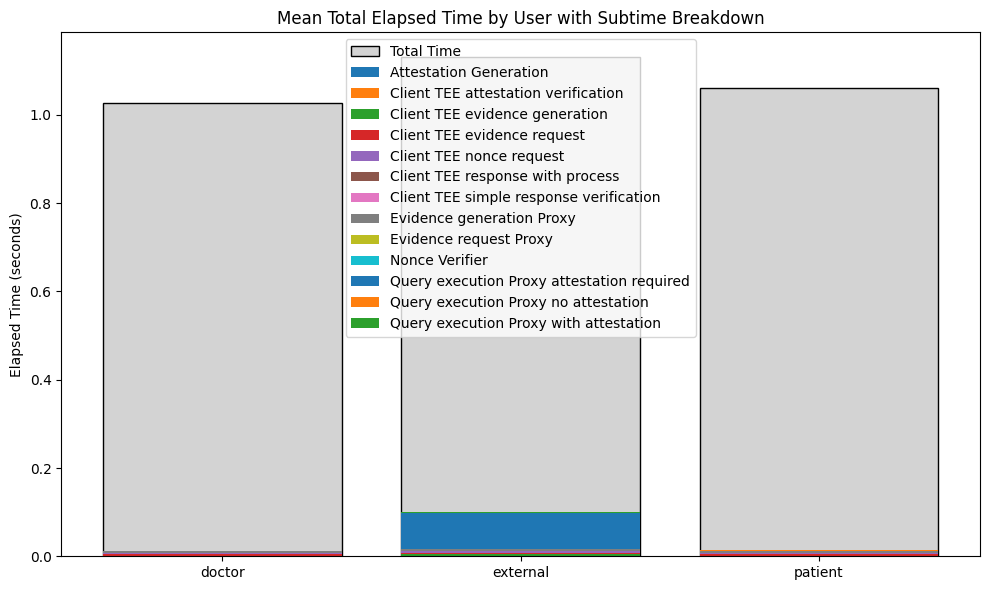

In [63]:
file_path = 'results_100_complex.csv'
df = pd.read_csv(file_path)

# Replace specific entries in the 'Client Result' column
df["Client Result"] = df["Client Result"].replace({
    "[{\"bp\": 100}]": "total time",
    "[{'mean_bp': 80.0, 'comparison': '1'}]": "total time"
})

# Backfill to associate subtimes with the corresponding user
df["User ID"] = df["User ID"].bfill()

# Extract user category from User ID
df["User"] = df["User ID"].str.extract(r"([a-zA-Z]+)")


# Separate total times and subtimes
total_times = df[df["Client Result"] == "total time"].copy()
subtimes = df[df["Client Result"] != "total time"].copy()

# Calculate mean total elapsed time for each user
mean_total_times = total_times.groupby("User")["Elapsed Time (seconds)"].mean()

# Calculate mean subtimes per user and operation
subtimes_grouped = subtimes.groupby(["User", "Client Result"])["Elapsed Time (seconds)"].mean().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_positions = range(len(mean_total_times))
bars = ax.bar(bar_positions, mean_total_times, label="Total Time", color="lightgray", edgecolor="black")

# Stack subtimes
bottom = [0] * len(mean_total_times)
for operation in subtimes_grouped.columns:
    times = subtimes_grouped[operation].reindex(mean_total_times.index, fill_value=0)
    ax.bar(bar_positions, times, bottom=bottom, label=operation)
    bottom = [b + t for b, t in zip(bottom, times)]

# Add labels and legend
ax.set_xticks(bar_positions)
ax.set_xticklabels(mean_total_times.index)
ax.set_ylabel("Elapsed Time (seconds)")
ax.set_title("Mean Total Elapsed Time by User with Subtime Breakdown")
ax.legend()

plt.tight_layout()
plt.show()

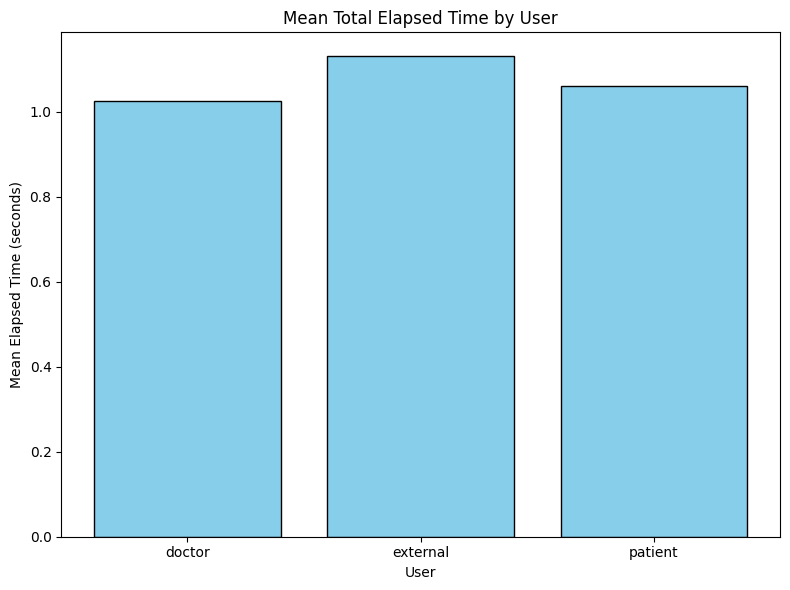

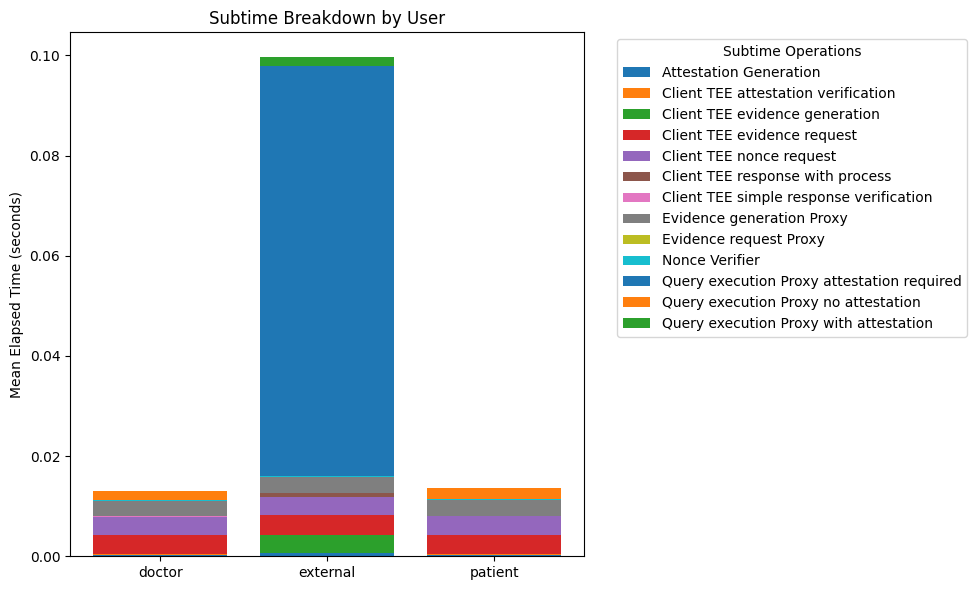

In [64]:
file_path = 'results_100_complex.csv'
df = pd.read_csv(file_path)

# Replace specific entries in the 'Client Result' column
df["Client Result"] = df["Client Result"].replace({
    "[{\"bp\": 100}]": "total time",
    "[{'mean_bp': 80.0, 'comparison': '1'}]": "total time"
})


# Backfill to associate subtimes with the corresponding user
df["User ID"] = df["User ID"].bfill()

# Extract user category from User ID
df["User"] = df["User ID"].str.extract(r"([a-zA-Z]+)")

# Separate total times and subtimes
total_times = df[df["Client Result"] == "total time"].copy()
subtimes = df[df["Client Result"] != "total time"].copy()

# Calculate mean total elapsed time for each user
mean_total_times = total_times.groupby("User")["Elapsed Time (seconds)"].mean()

# Calculate mean subtimes per user and operation
subtimes_grouped = subtimes.groupby(["User", "Client Result"])["Elapsed Time (seconds)"].mean().unstack(fill_value=0)

# First Graph: Total Times
plt.figure(figsize=(8, 6))
plt.bar(mean_total_times.index, mean_total_times, color="skyblue", edgecolor="black")
plt.ylabel("Mean Elapsed Time (seconds)")
plt.title("Mean Total Elapsed Time by User")
plt.xlabel("User")
plt.tight_layout()
plt.show()

# Second Graph: Subtimes
fig, ax = plt.subplots(figsize=(10, 6))
bar_positions = range(len(subtimes_grouped))
bottom = [0] * len(bar_positions)

# Stacked bars for subtimes
for operation in subtimes_grouped.columns:
    times = subtimes_grouped[operation]
    ax.bar(bar_positions, times, bottom=bottom, label=operation)
    bottom = [b + t for b, t in zip(bottom, times)]

# Add labels and legend
ax.set_xticks(bar_positions)
ax.set_xticklabels(subtimes_grouped.index)
ax.set_ylabel("Mean Elapsed Time (seconds)")
ax.set_title("Subtime Breakdown by User")
ax.legend(title="Subtime Operations", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

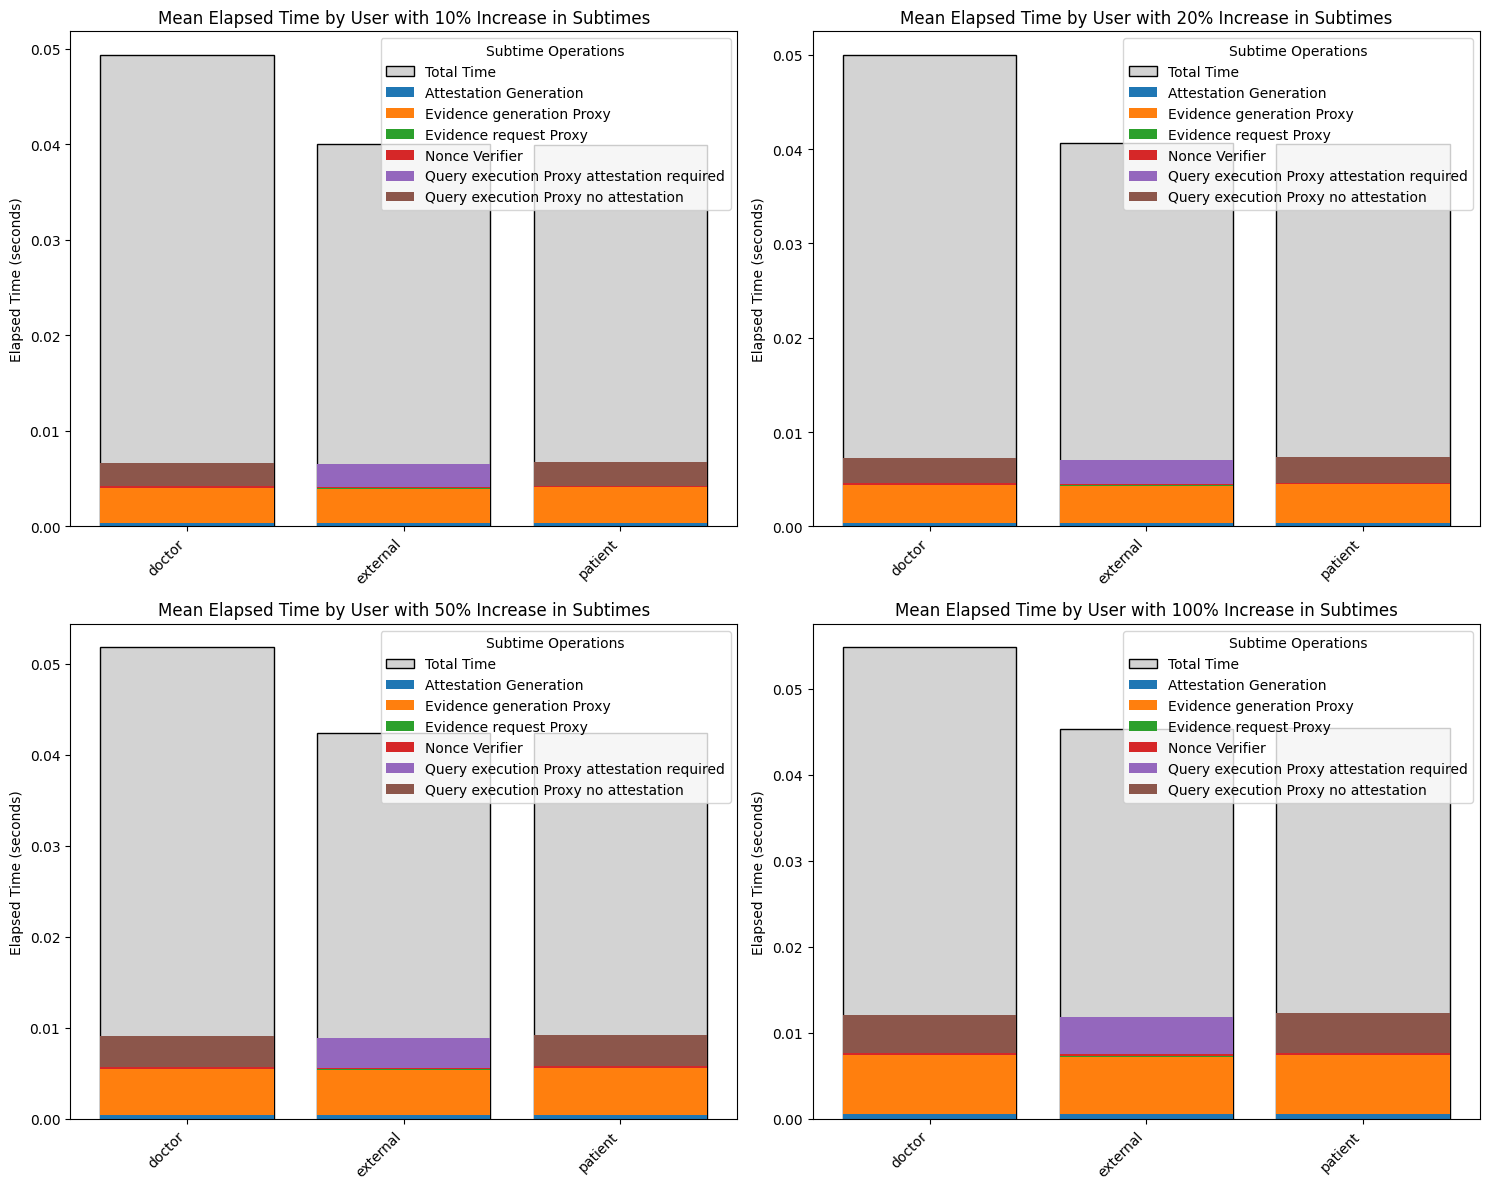

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'results_100_basic.csv'
df = pd.read_csv(file_path)

# Replace specific entries in the 'Client Result' column
df["Client Result"] = df["Client Result"].replace({
    "b'[{\"bp\": 100}]'": "total time",
    "Attestation required, access denied": "total time"
})

# Backfill to associate subtimes with the corresponding user
df["User ID"] = df["User ID"].bfill()

# Extract user category from User ID
df["User"] = df["User ID"].str.extract(r"([a-zA-Z]+)")

# Separate total times and subtimes
total_times = df[df["Client Result"] == "total time"].copy()
subtimes = df[df["Client Result"] != "total time"].copy()

# Base mean total elapsed time per user
mean_total_times = total_times.groupby("User")["Elapsed Time (seconds)"].mean()

# Mean subtimes grouped by user and operation
subtimes_grouped = subtimes.groupby(["User", "Client Result"])["Elapsed Time (seconds)"].mean().unstack(fill_value=0)

# Scaling percentages
scaling_factors = [10, 20, 50, 100]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Iterate through scaling factors
for i, scale in enumerate(scaling_factors):
    ax = axes[i]
    
    # Scale subtimes by the given percentage
    scaled_subtimes = subtimes_grouped * (1 + scale / 100)
    
    # Recalculate total time by adding scaled subtimes for each user
    scaled_total_times = mean_total_times + scaled_subtimes.sum(axis=1) - subtimes_grouped.sum(axis=1)
    
    # Plot results
    bar_positions = range(len(scaled_total_times))
    
    # Plot total times
    ax.bar(bar_positions, scaled_total_times, label="Total Time", color="lightgray", edgecolor="black")
    
    # Stack scaled subtimes
    bottom = [0] * len(scaled_total_times)
    for operation in scaled_subtimes.columns:
        times = scaled_subtimes[operation].reindex(scaled_total_times.index, fill_value=0)
        ax.bar(bar_positions, times, bottom=bottom, label=operation)
        bottom = [b + t for b, t in zip(bottom, times)]
    
    # Add labels and legend
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(scaled_total_times.index, rotation=45, ha="right")
    ax.set_ylabel("Elapsed Time (seconds)")
    ax.set_title(f"Mean Elapsed Time by User with {scale}% Increase in Subtimes")
    ax.legend(title="Subtime Operations")

plt.tight_layout()
plt.show()

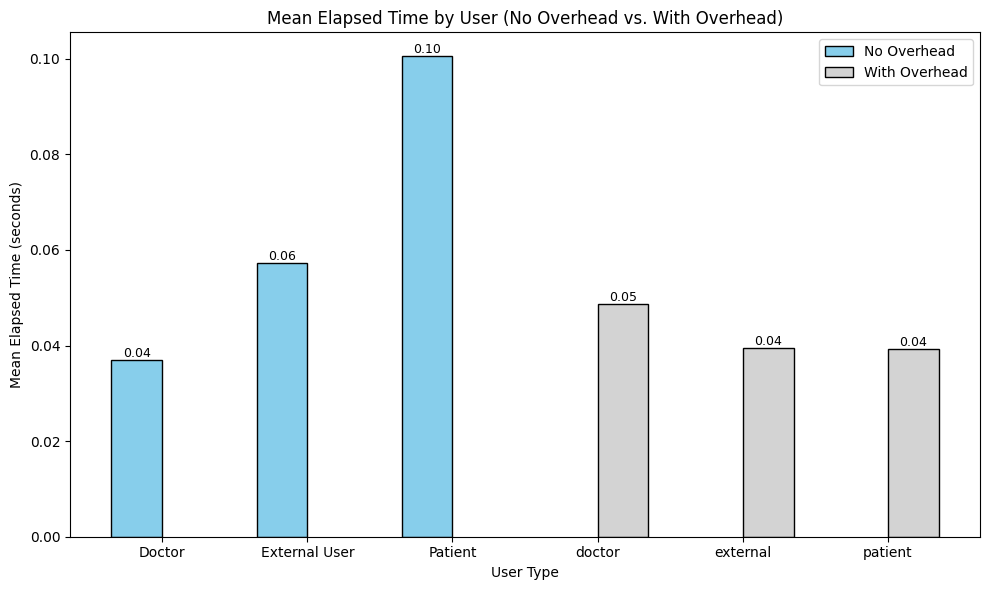

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
file_path_no_overhead = 'results_100_basic_no_overhead.csv'
file_path_with_overhead = 'results_100_basic.csv'

df_no_overhead = pd.read_csv(file_path_no_overhead)
df_with_overhead = pd.read_csv(file_path_with_overhead)

# Custom labels for the no overhead dataset
user_labels = {
    "patient1": "Patient",
    "doctor1": "Doctor",
    "external1": "External User"
}
df_no_overhead["User"] = df_no_overhead["User ID"].map(user_labels)

# Calculate mean elapsed time for the no overhead dataset
mean_no_overhead = df_no_overhead.groupby("User")["Elapsed Time (seconds)"].mean()

# Process the with overhead dataset
df_with_overhead["Client Result"] = df_with_overhead["Client Result"].replace({
    "b'[{\"bp\": 100}]'": "total time",
    "Attestation required, access denied": "total time"
})
df_with_overhead["User ID"] = df_with_overhead["User ID"].bfill()
df_with_overhead["User"] = df_with_overhead["User ID"].str.extract(r"([a-zA-Z]+)")
mean_with_overhead = df_with_overhead[df_with_overhead["Client Result"] == "total time"] \
    .groupby("User")["Elapsed Time (seconds)"].mean()

# Combine datasets
combined_df = pd.DataFrame({
    "No Overhead": mean_no_overhead,
    "With Overhead": mean_with_overhead
}).reset_index()

# Plotting the combined bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(combined_df))

# Plot No Overhead bars
ax.bar(x - bar_width / 2, combined_df["No Overhead"], bar_width, label="No Overhead", color="skyblue", edgecolor="black")

# Plot With Overhead bars
ax.bar(x + bar_width / 2, combined_df["With Overhead"], bar_width, label="With Overhead", color="lightgray", edgecolor="black")

# Customize plot
ax.set_xticks(x)
ax.set_xticklabels(combined_df["User"])
ax.set_xlabel("User Type")
ax.set_ylabel("Mean Elapsed Time (seconds)")
ax.set_title("Mean Elapsed Time by User (No Overhead vs. With Overhead)")
ax.legend()

# Annotate bars with values
for bars in ax.patches:
    height = bars.get_height()
    if height > 0:
        ax.text(
            bars.get_x() + bars.get_width() / 2,
            height,
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.tight_layout()
plt.show()
